This is based on the tutorials from following links:
https://sites.google.com/site/miningtwitter/questions/sentiment/sentiment
http://jeffreybreen.wordpress.com/2011/07/04/twitter-text-mining-r-slides/
https://github.com/benmarwick/AAA2011-Tweets/blob/master/AAA2011.R

In [1]:
# Set working directory
setwd("/home/manohar/Documents/Sentiment_Analysis/script")

# Load libraries
library(wordcloud)
library(tm)
library(plyr)
library(ggplot2)
library(grid)
library(sentiment)
library(Rgraphviz)

Loading required package: RColorBrewer
Loading required package: NLP

Attaching package: ‘ggplot2’

The following object is masked from ‘package:NLP’:

    annotate

Warning message:
: package ‘sentiment’ was built under R version 3.3.0Loading required package: Rstem
Warning message:
: package ‘Rstem’ was built under R version 3.3.0Loading required package: graph

Attaching package: ‘graph’

The following object is masked from ‘package:plyr’:

    join



In [2]:
df <- read.table("../input/data.csv",sep=",",header=TRUE)
corp <- Corpus(VectorSource(df$Review)) 
corp <- tm_map(corp, tolower) 
corp <- tm_map(corp, removePunctuation)
corp <- tm_map(corp, removeNumbers)
# corp <- tm_map(corp, stemDocument, language = "english") 
corp <- tm_map(corp, removeWords, c("the", stopwords("english"))) 
corp <- tm_map(corp, PlainTextDocument)
corp.tdm <- TermDocumentMatrix(corp, control = list(minWordLength = 3)) 
corp.dtm <- DocumentTermMatrix(corp, control = list(minWordLength = 3)) 


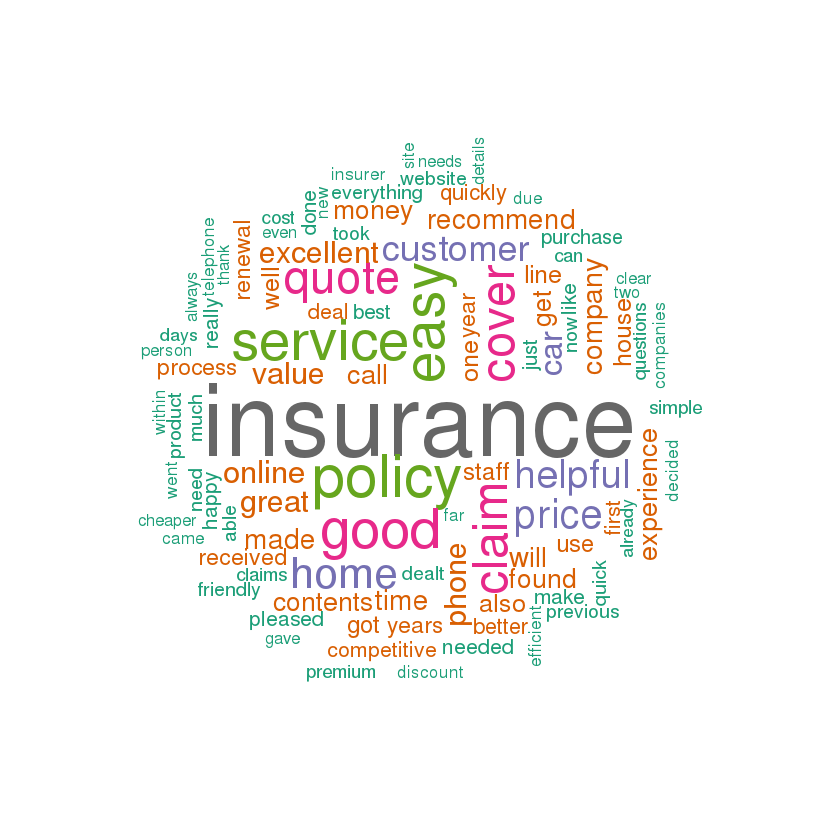

In [3]:
wordcloud(corp, scale=c(5,0.5), max.words=100, random.order=FALSE, rot.per=0.35, use.r.layout=FALSE, colors=brewer.pal(8, 'Dark2'))

In [4]:
findFreqTerms(corp.tdm, lowfreq=30)

[1] "able"            "advisor"         "already"         "also"           
  [5] "although"        "always"          "amount"          "another"        
  [9] "answered"        "anyone"          "around"          "ask"            
 [13] "asked"           "back"            "benefits"        "best"           
 [17] "better"          "bit"             "bought"          "buildings"      
 [21] "buy"             "buying"          "call"            "called"         
 [25] "calls"           "came"            "can"             "car"            
 [29] "cars"            "centre"          "certainly"       "change"         
 [33] "cheaper"         "cheapest"        "claim"           "claims"         
 [37] "clear"           "companies"       "company"         "compared"       
 [41] "comparison"      "competitive"     "complete"        "contact"        
 [45] "contacted"       "contents"        "cost"            "couldnt"        
 [49] "couple"          "cover"           "covered"         "current"        
 [53] "customer"        "damage"          "day"             "days"           
 [57] "deal"            "dealing"         "dealt"           "decided"        
 [61] "details"         "didnt"           "discount"        "documents"      
 [65] "done"            "due"             "ease"            "easily"         
 [69] "easy"            "efficient"       "email"           "end"            
 [73] "even"            "ever"            "every"           "everything"     
 [77] "exactly"         "excellent"       "existing"        "experience"     
 [81] "explained"       "extra"           "extremely"       "fair"           
 [85] "family"          "far"             "feel"            "felt"           
 [89] "find"            "first"           "follow"          "forward"        
 [93] "found"           "free"            "friendly"        "friends"        
 [97] "gave"            "get"             "getting"         "give"           
[101] "given"           "good"            "got"             "great"          
[105] "happy"           "hassle"          "help"            "helpful"        
[109] "highly"          "home"            "hope"            "house"          
[113] "however"         "impressed"       "information"     "insurance"      
[117] "insured"         "insurer"         "insurers"        "internet"       
[121] "just"            "know"            "last"            "later"          
[125] "left"            "less"            "level"           "like"           
[129] "line"            "long"            "looked"          "looking"        
[133] "lot"             "made"            "make"            "making"         
[137] "many"            "money"           "motor"           "much"           
[141] "need"            "needed"          "needs"           "never"          
[145] "new"             "next"            "now"             "number"         
[149] "offer"           "offered"         "old"             "one"            
[153] "online"          "options"         "others"          "overall"        
[157] "paid"            "payment"         "people"          "person"         
[161] "phone"           "phoned"          "pleasant"        "pleased"        
[165] "policies"        "policy"          "polite"          "premium"        
[169] "previous"        "price"           "problem"         "problems"       
[173] "process"         "product"         "professional"    "provided"       
[177] "provider"        "purchase"        "purchased"       "questions"      
[181] "quick"           "quickly"         "quite"           "quote"          
[185] "quotes"          "rang"            "really"          "reasonable"     
[189] "received"        "recently"        "recommend"       "recommended"    
[193] "renewal"         "required"        "requirements"    "response"       
[197] "review"          "right"           "said"            "satisfied"      
[201] "saved"           "saving"          "say"             "see"            
[205] "sent"            

In [5]:
findAssocs(corp.tdm, 'claim', 0.2)

$claim
   chased   contain     dried everybody       hot      make    marley      tank 
     0.26      0.26      0.26      0.26      0.26      0.26      0.26      0.26 
  settled   process     first     never   quickly     tiles     hence 
     0.25      0.24      0.22      0.21      0.21      0.21      0.20

In [21]:
findAssocs(corp.tdm, c("claim", "insurance", "policy"), c(0.2, 0.2, 0.2))

$claim
   chased   contain     dried everybody       hot      make    marley      tank 
     0.26      0.26      0.26      0.26      0.26      0.26      0.26      0.26 
  settled   process     first     never   quickly     tiles     hence 
     0.25      0.24      0.22      0.21      0.21      0.21      0.20 

$insurance
    home      car  already contents  decided    motor    house   travel 
    0.50     0.49     0.28     0.26     0.23     0.23     0.22     0.20 

$policy
documents    number 
     0.23      0.22

In [6]:
corp.tdm.df <- data.frame(inspect(corp.tdm))

<<TermDocumentMatrix (terms: 4172, documents: 1616)>>
Non-/sparse entries: 32877/6709075
Sparsity           : 100%
Maximal term length: 21
Weighting          : term frequency (tf)

                       Docs
Terms                   character(0) character(0) character(0) character(0)
  abandoned                        0            0            0            0
  ability                          0            0            0            0
  able                             0            0            0            0
  abroad                           0            0            1            0
  absence                          0            0            0            0
  absent                           0            0            0            0
  absoloutly                       0            0            0            0
  absolute                         0            0            0            0
  absolutely                       0            0            0            0
  abused                       

In [7]:
corp.tdm.df <- sort(rowSums(corp.tdm.df),decreasing=TRUE) # populate term frequency and sort in decesending order
df.freq <- data.frame(word = names(corp.tdm.df),freq=corp.tdm.df) # Table with terms and frequency

# Set minimum term frequency value. The charts will be created for terms > or = to the minimum value that we set.
freqControl <- 100

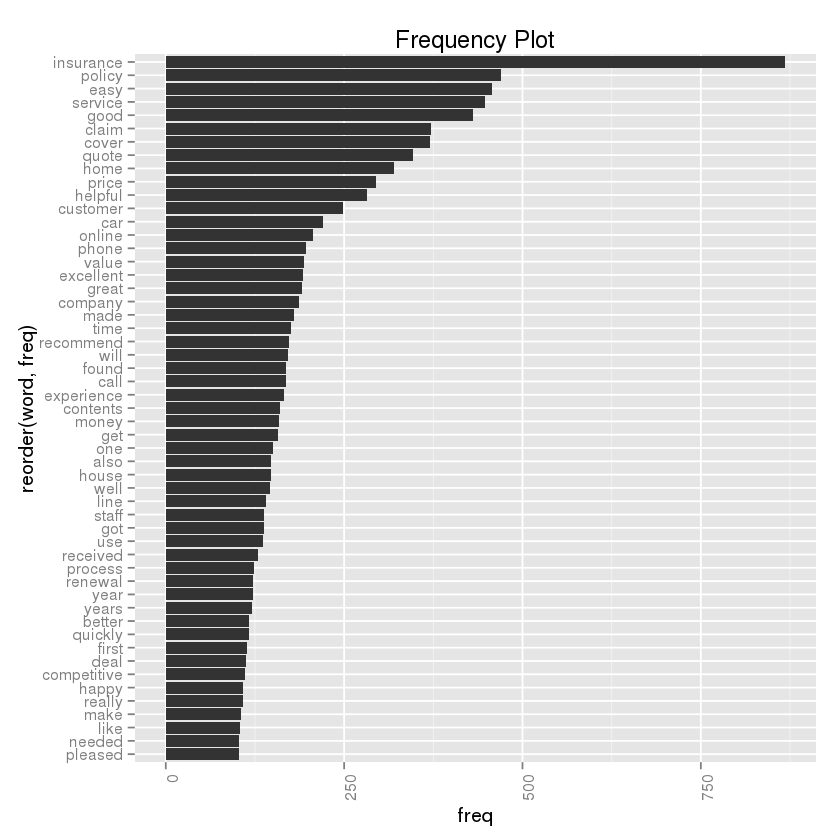

In [8]:
# Frequency Plot
freqplotData <- subset(df.freq, df.freq$freq > freqControl)
freqplotData$word <- ordered(freqplotData$word,levels=levels(freqplotData$word)[unclass(freqplotData$word)])
freqplot <- ggplot(freqplotData,aes(reorder(word,freq), freq))
freqplot <- freqplot + geom_bar(stat="identity")
freqplot <- freqplot + theme(axis.text.x=element_text(angle=90,hjust=1)) + coord_flip() 
freqplot + xlim(rev(levels(freqplotData$word)))+ ggtitle("Frequency Plot")

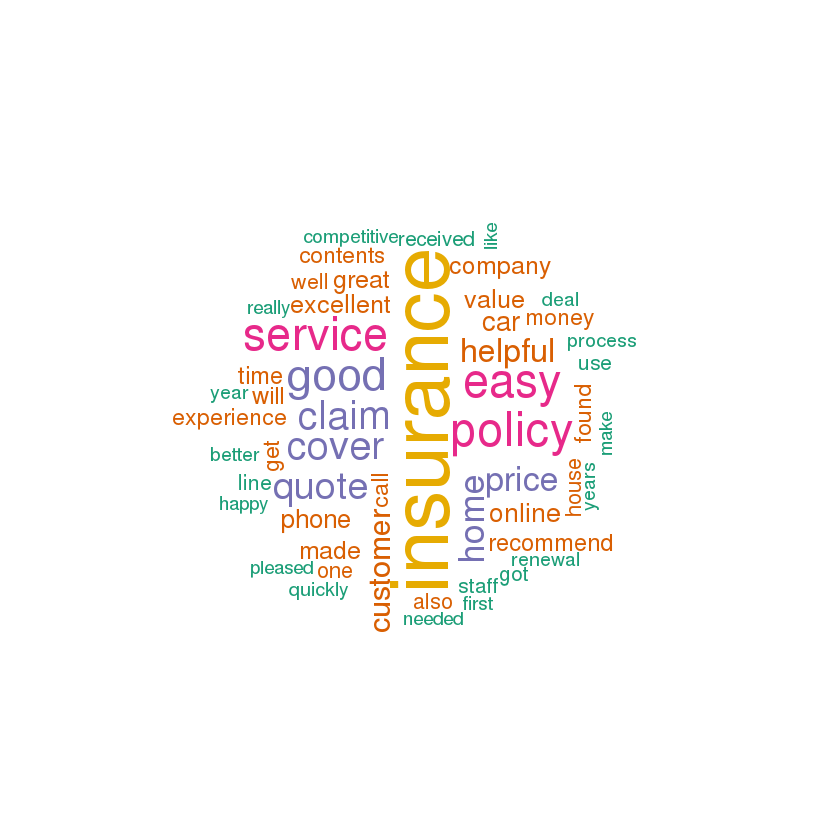

In [9]:
# Wordcloud
# To change the proportion of words that are rotated by 90 degrees from the 20%, change option rot.per=0.2 appropriately
dark2 <- brewer.pal(6,"Dark2")
wordcloud(df.freq$word,df.freq$freq,min.freq=freqControl,random.order=FALSE, rot.per=0.2,colors=dark2,main="Corpus wordcloud")

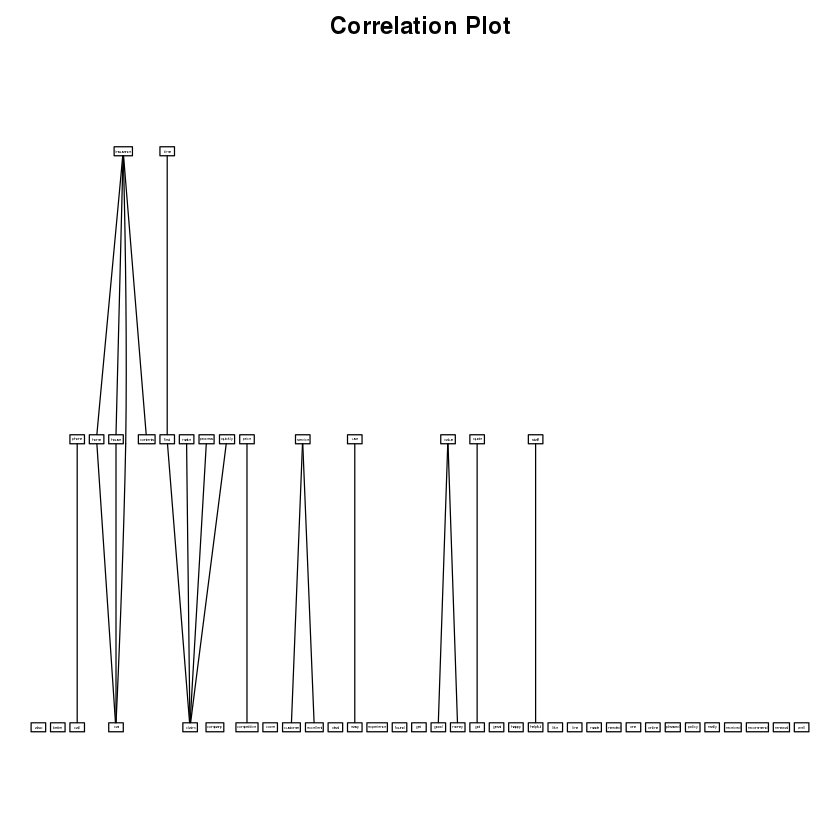

In [10]:
# Correlation Plot
# 50 of the more frequent words has been chosen as the nodes and include links between words
# when they have at least a correlation of 0.5
# By default (without providing terms and a correlation threshold) the plot function chooses a
# random 20 terms with a threshold of 0.7
plot(corp.tdm,terms=findFreqTerms(corp.tdm,lowfreq=freqControl)[1:50],corThreshold=0.2, main="Correlation Plot")

Warning message:
In wordcloud(pairedTerms, random.order = FALSE, colors = dark2, : willdrag could not be fit on page. It will not be plotted.Warning message:
In wordcloud(pairedTerms, random.order = FALSE, colors = dark2, : willinsurece could not be fit on page. It will not be plotted.Warning message:
In wordcloud(pairedTerms, random.order = FALSE, colors = dark2, : willofficantly could not be fit on page. It will not be plotted.Warning message:
In wordcloud(pairedTerms, random.order = FALSE, colors = dark2, : willwiggle could not be fit on page. It will not be plotted.Warning message:
In wordcloud(pairedTerms, random.order = FALSE, colors = dark2, : yearlast could not be fit on page. It will not be plotted.

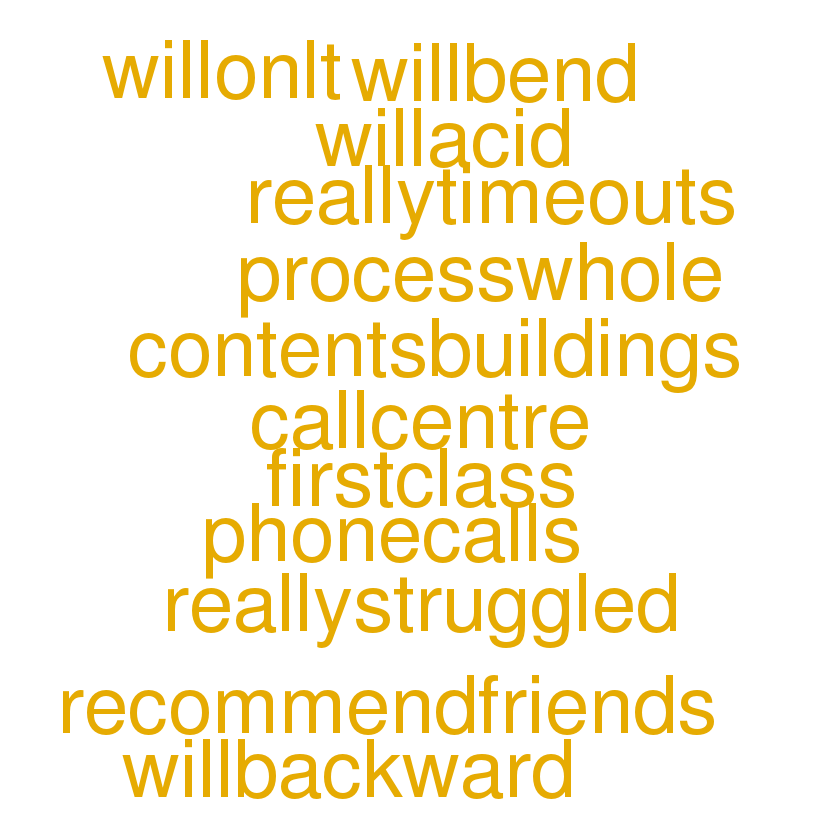

In [11]:
# Paired-Terms wordcloud
# pick the top N most frequent words and extract associated words with strong correlation (say 70%). 
# Combine individual top N words with every associated word.
nFreqTerms <- findFreqTerms(corp.dtm,lowfreq=freqControl)
nFreqTermsAssocs <- findAssocs(corp.dtm, nFreqTerms, 0.3)
pairedTerms <- c()
for (i in 1:length(nFreqTermsAssocs)){
  if(length(names(nFreqTermsAssocs[[i]]))!=0) 
    lapply(names(nFreqTermsAssocs[[i]]),function(x) pairedTerms <<- c(pairedTerms,paste(names(nFreqTermsAssocs[i]),x,sep="-")))
}
wordcloud(pairedTerms,random.order=FALSE,colors=dark2,main="Paired Wordcloud")

In [12]:
hu.liu.pos = scan('../input/positive-words.txt', what = 'character',comment.char=';') 
hu.liu.neg = scan('../input/negative-words.txt',what = 'character',comment.char= ';') 
pos.words = c(hu.liu.pos)
neg.words = c(hu.liu.neg)
score.sentiment = function(sentences, pos.words, neg.words, .progress='none')
{
  require(plyr)
  require(stringr)
  
  # we got a vector of sentences. plyr will handle a list
  # or a vector as an "l" for us
  # we want a simple array ("a") of scores back, so we use
  # "l" + "a" + "ply" = "laply":
  scores = laply(sentences, function(sentence, pos.words, neg.words) {
    
    # clean up sentences with R's regex-driven global substitute, gsub():
    sentence = gsub('[[:punct:]]', '', sentence)
    sentence = gsub('[[:cntrl:]]', '', sentence)
    sentence = gsub('\\d+', '', sentence)
    # and convert to lower case:
    sentence = tolower(sentence)
    
    # split into words. str_split is in the stringr package
    word.list = str_split(sentence, '\\s+')
    # sometimes a list() is one level of hierarchy too much
    words = unlist(word.list)
    
    # compare our words to the dictionaries of positive & negative terms
    pos.matches = match(words, pos.words)
    neg.matches = match(words, neg.words)
    
    # match() returns the position of the matched term or NA
    # we just want a TRUE/FALSE:
    pos.matches= !is.na(pos.matches)
    neg.matches= !is.na(neg.matches)
    
    # and conveniently enough, TRUE/FALSE will be treated as 1/0 by sum():
    score = sum(pos.matches) - sum(neg.matches)
    
    return(score)
  }, pos.words, neg.words, .progress=.progress )
  
  scores.df = data.frame(score=scores, text=sentences)
  return(scores.df)
}

In [13]:
review.scores<- score.sentiment(df$Review,pos.words,neg.words,.progress='text') 

Loading required package: stringr

Attaching package: ‘stringr’

The following object is masked from ‘package:graph’:

    boundary



  |======================================================================| 100%


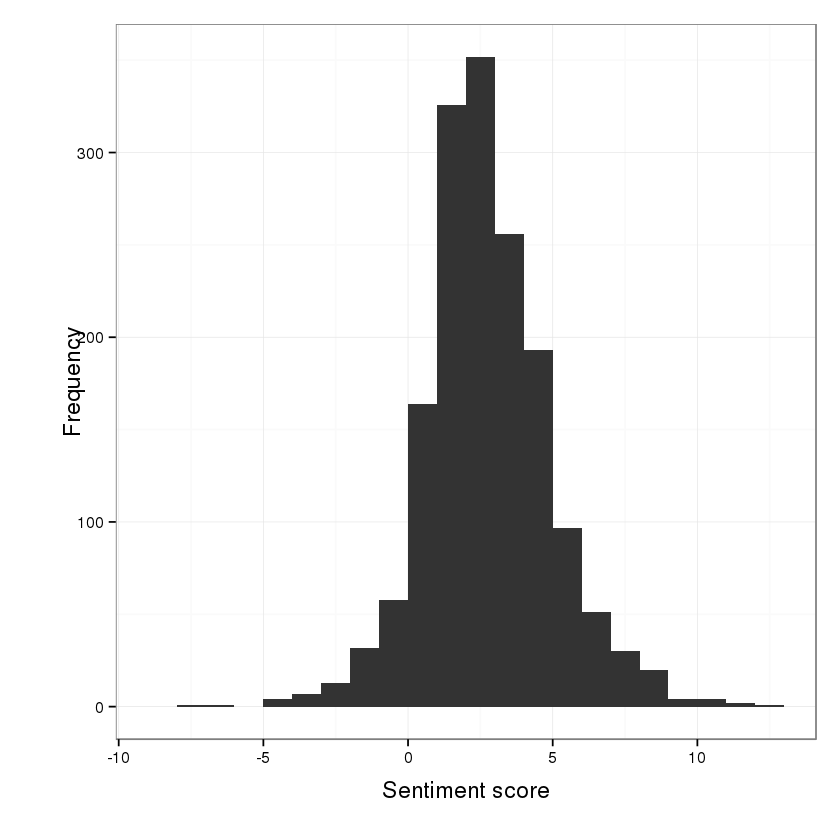

In [14]:
ggplot(review.scores, aes(x=score)) + 
  geom_histogram(binwidth=1) + 
  xlab("Sentiment score") + 
  ylab("Frequency") + 
  theme_bw()  + 
  theme(axis.title.x = element_text(vjust = -0.5, size = 14)) + 
  theme(axis.title.y=element_text(size = 14, angle=90, vjust = -0.25)) + 
  theme(plot.margin = unit(c(1,1,2,2), "lines"))

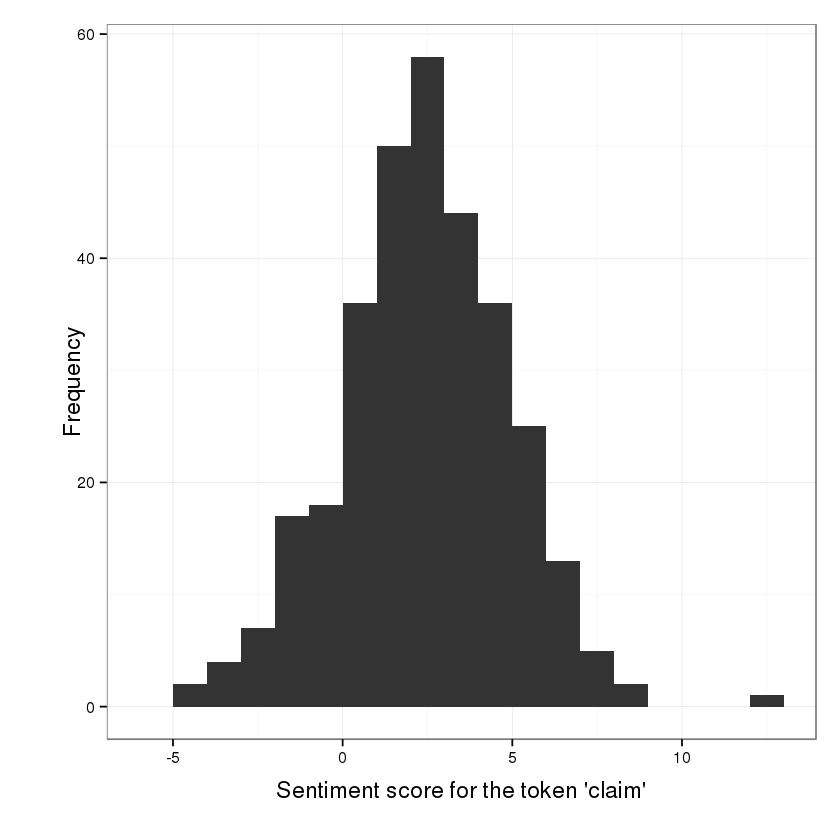

In [15]:
review.pos<- subset(review.scores,review.scores$score>= 2) 
review.neg<- subset(review.scores,review.scores$score<= -2)
claim <- subset(review.scores, regexpr("claim", review.scores$text) > 0) 
ggplot(claim, aes(x = score)) + geom_histogram(binwidth = 1) + xlab("Sentiment score for the token 'claim'") + ylab("Frequency") + theme_bw()  + theme(axis.title.x = element_text(vjust = -0.5, size = 14)) + theme(axis.title.y = element_text(size = 14, angle = 90, vjust = -0.25)) + theme(plot.margin = unit(c(1,1,2,2), "lines"))

In [16]:
#classify emotion
class_emo = classify_emotion(df$Review, algorithm="bayes", prior=1.0)
#get emotion best fit
emotion = class_emo[,7]
# substitute NA's by "unknown"
emotion[is.na(emotion)] = "unknown"

# classify polarity
class_pol = classify_polarity(df$Review, algorithm="bayes")

# get polarity best fit
polarity = class_pol[,4]

# data frame with results
sent_df = data.frame(text=df$Review, emotion=emotion, polarity=polarity, stringsAsFactors=FALSE)

# sort data frame
sent_df = within(sent_df, emotion <- factor(emotion, levels=names(sort(table(emotion), decreasing=TRUE))))

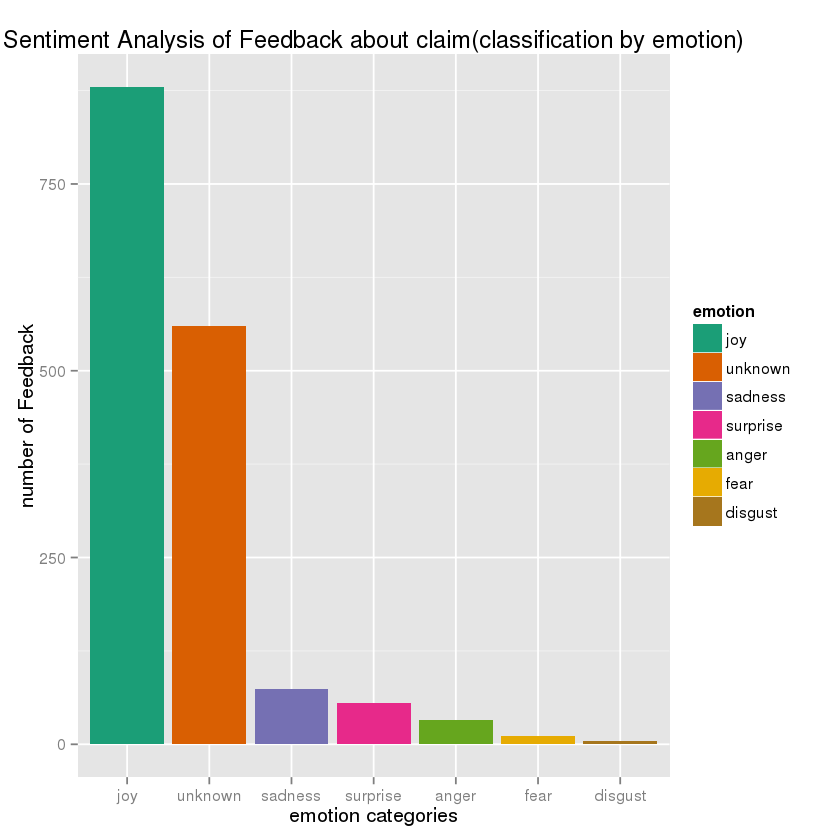

In [17]:
# plot distribution of emotions
ggplot(sent_df, aes(x=emotion)) +
  geom_bar(aes(y=..count.., fill=emotion)) +
  scale_fill_brewer(palette="Dark2") +
  labs(x="emotion categories", y="number of Feedback", 
       title = "Sentiment Analysis of Feedback about claim(classification by emotion)",
       plot.title = element_text(size=12))

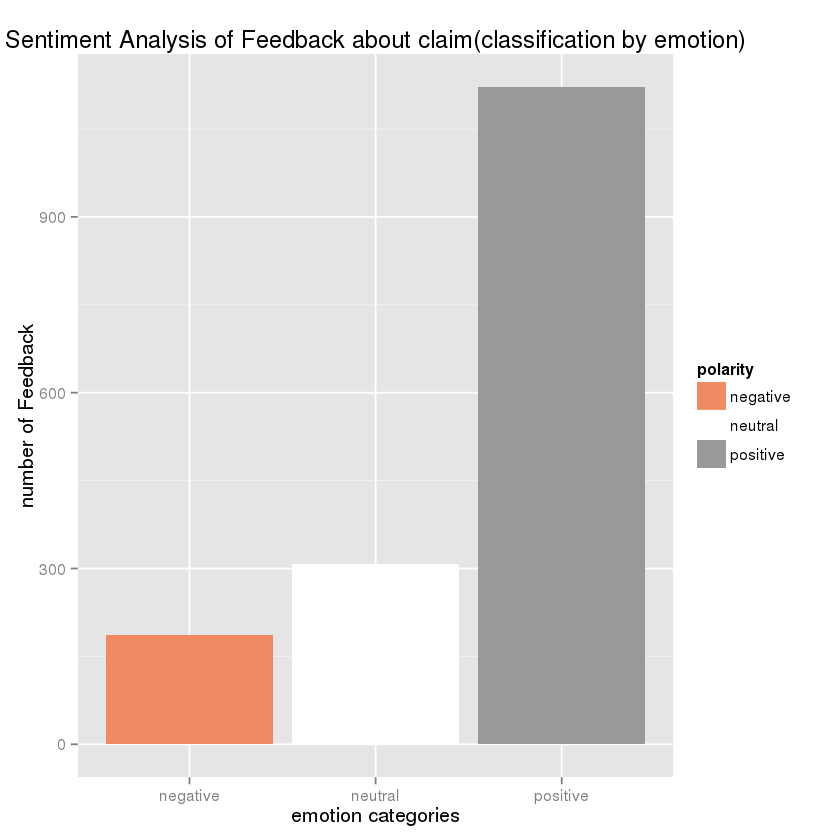

In [18]:
# plot distribution of emotions
ggplot(sent_df, aes(x=polarity)) +
  geom_bar(aes(y=..count.., fill=polarity)) +
  scale_fill_brewer(palette="RdGy") +
  labs(x="emotion categories", y="number of Feedback", 
       title = "Sentiment Analysis of Feedback about claim(classification by emotion)",
       plot.title = element_text(size=12))

In [19]:
# separating text by emotion
emos = levels(factor(sent_df$emotion))
nemo = length(emos)
emo.docs = rep("", nemo)
for (i in 1:nemo)
{
  tmp = df$Review[emotion == emos[i]]
  emo.docs[i] = paste(tmp, collapse=" ")
}

# remove stopwords
emo.docs = removeWords(emo.docs, stopwords("english"))
# create corpus
corpus = Corpus(VectorSource(emo.docs))
tdm = TermDocumentMatrix(corpus)
tdm = as.matrix(tdm)
colnames(tdm) = emos

Warning message:
In comparison.cloud(tdm, colors = brewer.pal(nemo, "Dark2"), scale = c(3, : trusting could not be fit on page. It will not be plotted.Warning message:
In comparison.cloud(tdm, colors = brewer.pal(nemo, "Dark2"), scale = c(3, : wallpaper could not be fit on page. It will not be plotted.Warning message:
In comparison.cloud(tdm, colors = brewer.pal(nemo, "Dark2"), scale = c(3, : wondered could not be fit on page. It will not be plotted.Warning message:
In comparison.cloud(tdm, colors = brewer.pal(nemo, "Dark2"), scale = c(3, : ...wont could not be fit on page. It will not be plotted.Warning message:
In comparison.cloud(tdm, colors = brewer.pal(nemo, "Dark2"), scale = c(3, : work! could not be fit on page. It will not be plotted.Warning message:
In comparison.cloud(tdm, colors = brewer.pal(nemo, "Dark2"), scale = c(3, : drawn could not be fit on page. It will not be plotted.Warning message:
In comparison.cloud(tdm, colors = brewer.pal(nemo, "Dark2"), scale = c(3, : meter c

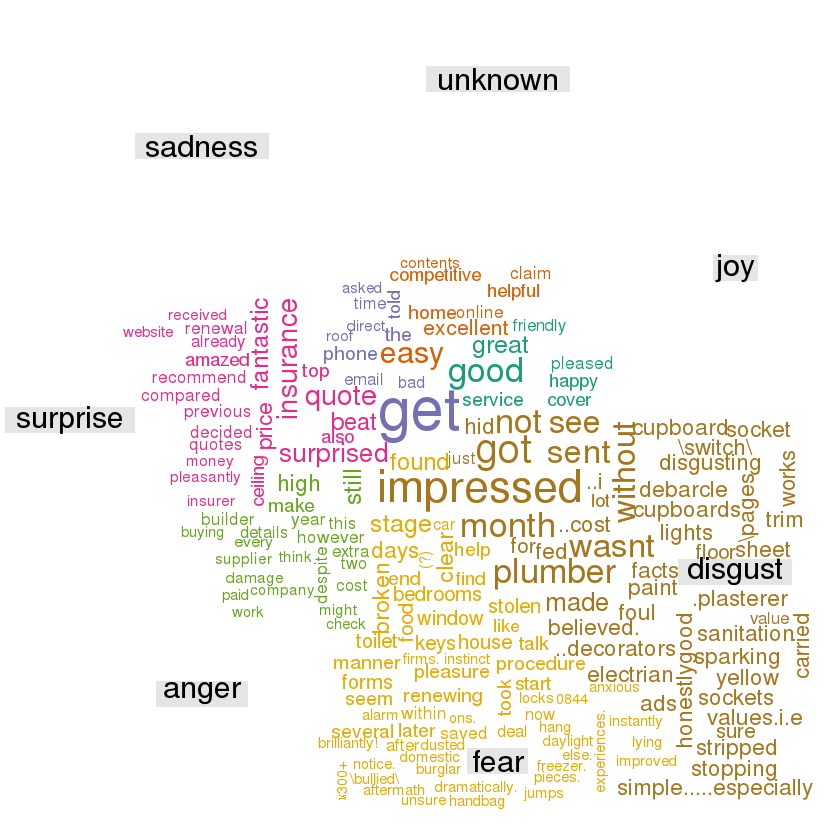

In [20]:
# comparison word cloud
comparison.cloud(tdm, colors = brewer.pal(nemo, "Dark2"),
                 scale = c(3,.5), random.order = FALSE, title.size = 1.5)